In [1]:
# Import statements here
import polars as pl
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.neighbors import KNeighborsRegressor
from sklearn.metrics import mean_squared_error
import statsmodels.api as sm

# Lab 1 - Vibe coding in Colab with Gemini.

**Context.** The phrase *vibe coding* refers to the act of using an LLM to write your code instead of writing the code yourself.

**Lab Objectives.**
1. Practice vibe coding in Colab using Gemini,
2. Investigate two problems with both a parametric model and non-parametric models for regression, namely ordinary least squares (OLS) and k nearest neighbors (kNN).
3. Identify when a parametric model is advantagous.
4. Learn to be the boss of the LLM.

**Rules.**
1. Use `polars` for data management.
2. Use the assignment expression to assign values to variables.
3. Make clean visualization code using either `plotnine` or `seaborn`.
4. Display all important information using judicuous applications of multiple cells.
5. Avoid the following: `print`, `for`, and unnecessary functions using `def`

## Problem 1 - Loading and inspecting the data

**Link.** `https://www.statlearning.com/s/Advertising.csv`

**Tasks.**
1. Open a code cell and text cell below this cell and use these to capture your work.  Add cells as needed!
2. Ask Gemini to load the data without extra guidance.  What package did it use? pandas automatically
3. Now ask Gemini to load the data using `polars`.  Did it use assignment statement or the assignment expression?  What was the consequence?  Did it use `print`? it used assignemnt statement and I had to use more memeory to run
4. Again, ask Gemini to load the data using `polars`, but this time using the `"Assignment expression with the walrus operator"`.  Comment on the results. It was simple one line code that doesnt use extra memory or take more typing
5. There is a problem with the columns.  Inspect the columns and find the problem.  Use data verbs (select, filter, mutate) to fix the issue. It had an empty column

In [ ]:
# Display head of X
X.head()

In [ ]:
# Display head of y
y.head()

In [ ]:
# Display head of X_explicit
X_explicit.head()

In [ ]:
# Display head of y_explicit
y_explicit.head()

In [ ]:
# Display head of X_pd
X_pd.head()

In [ ]:
# Display head of y_pd
y_pd.head()

In [ ]:
# Display head of X_train_manual
X_train_manual.head()

In [ ]:
# Display head of X_test_manual
X_test_manual.head()

In [ ]:
# Display head of y_train_manual
y_train_manual.head()

In [ ]:
# Display head of y_test_manual
y_test_manual.head()

In [59]:
url = 'https://www.statlearning.com/s/Advertising.csv'
df = pd.read_csv(url)
df.head()

,Unnamed: 0,TV,radio,newspaper,sales
0,1,230.1,37.8,69.2,22.1
1,2,44.5,39.3,45.1,10.4
2,3,17.2,45.9,69.3,9.3
3,4,151.5,41.3,58.5,18.5
4,5,180.8,10.8,58.4,12.9


### Task 3: Ask Gemini to load the data using `polars`. Did it use assignment statement or the assignment expression? What was the consequence? Did it use `print`?

It used assignment statement and did not use print, it used display instead

In [60]:
url = 'https://www.statlearning.com/s/Advertising.csv'
df_polars = pl.read_csv(url)
df_polars.head()

,TV,radio,newspaper,sales
i64,f64,f64,f64,f64
1,230.1,37.8,69.2,22.1
2,44.5,39.3,45.1,10.4
3,17.2,45.9,69.3,9.3
4,151.5,41.3,58.5,18.5
5,180.8,10.8,58.4,12.9


### Task 4: Again, ask Gemini to load the data using `polars`, but this time using the "Assignment expression with the walrus operator". Comment on the results.

#### It used assignment expression to load data without using extra memory, and also enabled the use of the head() function to be used. Head is always preferred over display or print especially.

In [6]:
url = 'https://www.statlearning.com/s/Advertising.csv'
(df_polars_walrus := pl.read_csv(url)
).head()

,TV,radio,newspaper,sales
i64,f64,f64,f64,f64
1,230.1,37.8,69.2,22.1
2,44.5,39.3,45.1,10.4
3,17.2,45.9,69.3,9.3
4,151.5,41.3,58.5,18.5
5,180.8,10.8,58.4,12.9


### Task 5: There is a problem with the columns. Inspect the columns and find the problem. Use data verbs (select, filter, mutate) to fix the issue.

In [10]:
# Inspect the columns (implicitly displayed)
df_polars_walrus.columns

['', 'TV', 'radio', 'newspaper', 'sales']

In [61]:
# Fix the issue: remove the empty string column ''
df_fixed = df_polars_walrus.select(pl.all().exclude(''))

# Display the head of the fixed DataFrame implicitly
df_fixed.head()

TV,radio,newspaper,sales
f64,f64,f64,f64
230.1,37.8,69.2,22.1
44.5,39.3,45.1,10.4
17.2,45.9,69.3,9.3
151.5,41.3,58.5,18.5
180.8,10.8,58.4,12.9


In [12]:
df_fixed.columns

['TV', 'radio', 'newspaper', 'sales']

## Problem 2 - Visualize the data

1. Open a code cell and text cell below this cell and use these to capture your work.  Add cells as needed!
2. Ask Gemini visualize the data with sales as y and the other variables as the x values.  What package did it use?
It automatically used matplotlib and seaborn
3. Repeat the last step, but specify that we use `seaborn`.
4. Do this again, but this time use `plotnine`

**Questions.**
1. Compare and contrast the three implementations of the graphs.  Which is cleaner code?  Which do you prefer?
2. Comment on the relationship between the explanatory variables and the response.

Matplotlib
Pros: Very flexible and powerful; gives full control over plot details. Works well for simple plots and pairs nicely with Seaborn for customization.
Cons: Can be verbose and less intuitive, especially for complex plots or when managing figures and axes.

Seaborn
Pros: Creates attractive statistical plots with less code and integrates well into multi-plot figures.
Cons: Advanced customization still requires understanding Matplotlib underneath.

**Plotnine:**
    *   **Pros:** Inspired by R's ggplot2, `plotnine` uses a Grammar of Graphics approach. This means plots are built layer by layer, which leads to highly readable and structured code for complex visualizations.
    *   **Cons:** Grammar of graphics is harder to learn but once you get it is one big building block that is diverse it makes sense

**Which is cleaner code?** Seaborn has simpler cleaner code on average

**Which do I prefer?** If i knew seaborn better I would like it but ggplot is the most diverse with plotnine so I would probably use plotnine and ggplot first

### 2. Comment on the relationship between the explanatory variables and the response.
*   **TV Advertising vs. Sales:** There appears to be a strong, positive, and roughly linear relationship between TV advertising budget and sales. As TV advertising increases, sales generally tend to increase significantly.

*   **Radio Advertising vs. Sales:** There is also a positive relationship between radio advertising and sales, but it appears to be somewhat weaker and potentially more scattered than the TV relationship.

*   **Newspaper Advertising vs. Sales:** The relationship between newspaper advertising and sales appears to be the weakest and most scattered among the three. There doesn't seem to be a clear positive or linear trend.

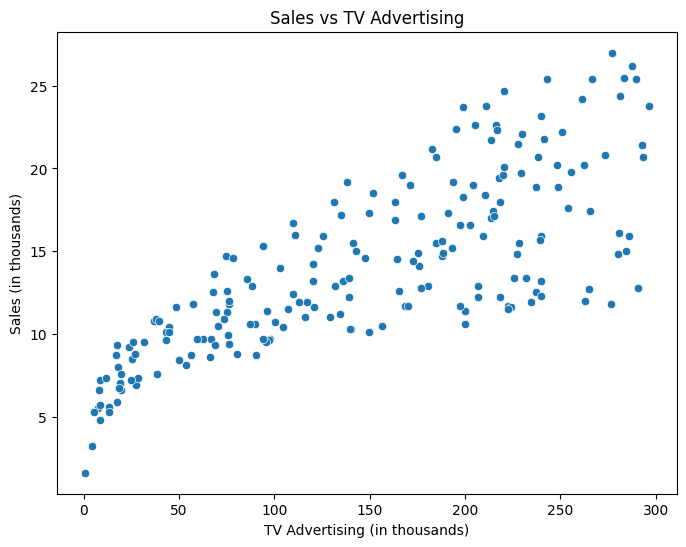

In [19]:
# Visualize the data with 'sales' as y and 'TV' as x using seaborn
import matplotlib.pyplot as plt
import seaborn as sns

# Convert polars DataFrame to pandas for easier visualization with seaborn
df_pd = df_fixed.to_pandas()

fig, ax = plt.subplots(figsize=(8, 6))
sns.scatterplot(data=df_pd, x='TV', y='sales', ax=ax)
ax.set_title('Sales vs TV Advertising')
ax.set_xlabel('TV Advertising (in thousands)')
ax.set_ylabel('Sales (in thousands)')
plt.show()

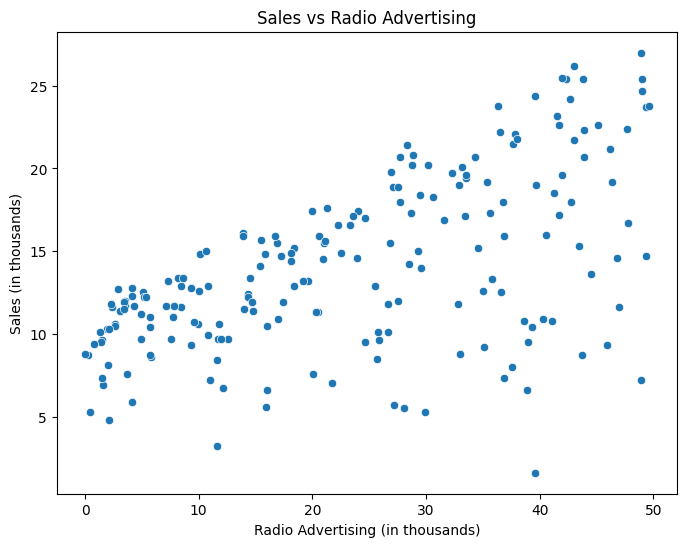

In [20]:
# Visualize the data with 'sales' as y and 'radio' as x using seaborn
import matplotlib.pyplot as plt
import seaborn as sns

# df_pd is already defined and converted from df_fixed in previous cells

fig, ax = plt.subplots(figsize=(8, 6))
sns.scatterplot(data=df_pd, x='radio', y='sales', ax=ax)
ax.set_title('Sales vs Radio Advertising')
ax.set_xlabel('Radio Advertising (in thousands)')
ax.set_ylabel('Sales (in thousands)')
plt.show()

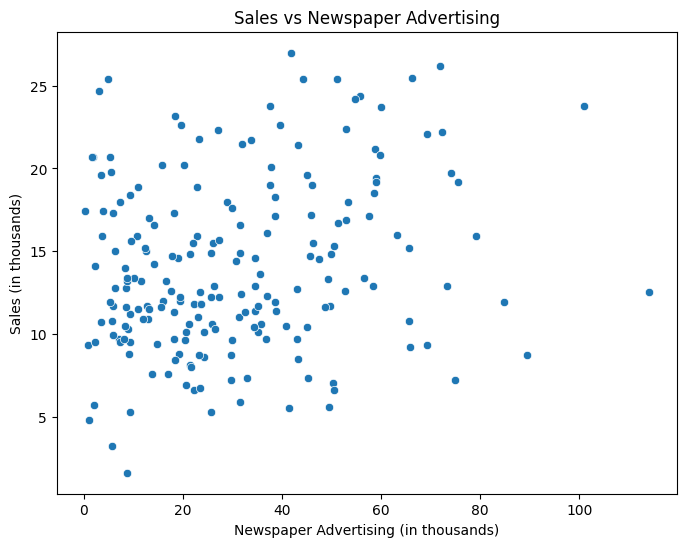

In [21]:
# Visualize the data with 'sales' as y and 'newspaper' as x using seaborn
import matplotlib.pyplot as plt
import seaborn as sns

# df_pd is already defined and converted from df_fixed in previous cells

fig, ax = plt.subplots(figsize=(8, 6))
sns.scatterplot(data=df_pd, x='newspaper', y='sales', ax=ax)
ax.set_title('Sales vs Newspaper Advertising')
ax.set_xlabel('Newspaper Advertising (in thousands)')
ax.set_ylabel('Sales (in thousands)')
plt.show()

### First time through visualizing Gemnini loaded both seaborn and matplotlib and used both of these packages to get the graphs as seen above. Therefore the seabon graphs have been done above.

### Task 4: Do this again, but this time use `plotnine`

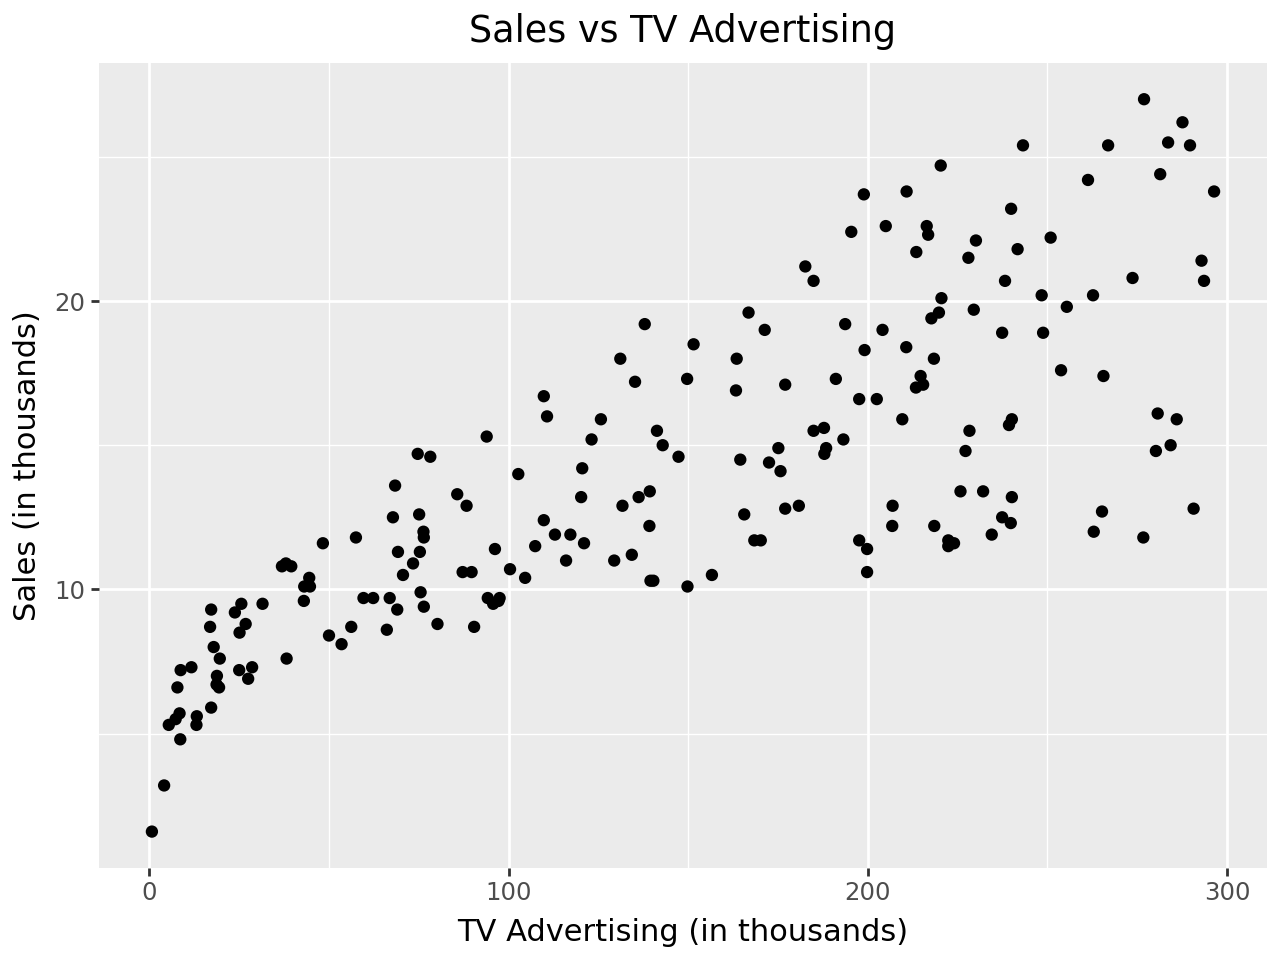

In [22]:
from plotnine import ggplot, aes, geom_point, labs

# Convert polars DataFrame to pandas for compatibility with plotnine
df_pd = df_fixed.to_pandas()

(ggplot(df_pd, aes(x='TV', y='sales'))
 + geom_point()
 + labs(title='Sales vs TV Advertising',
        x='TV Advertising (in thousands)',
        y='Sales (in thousands)'))

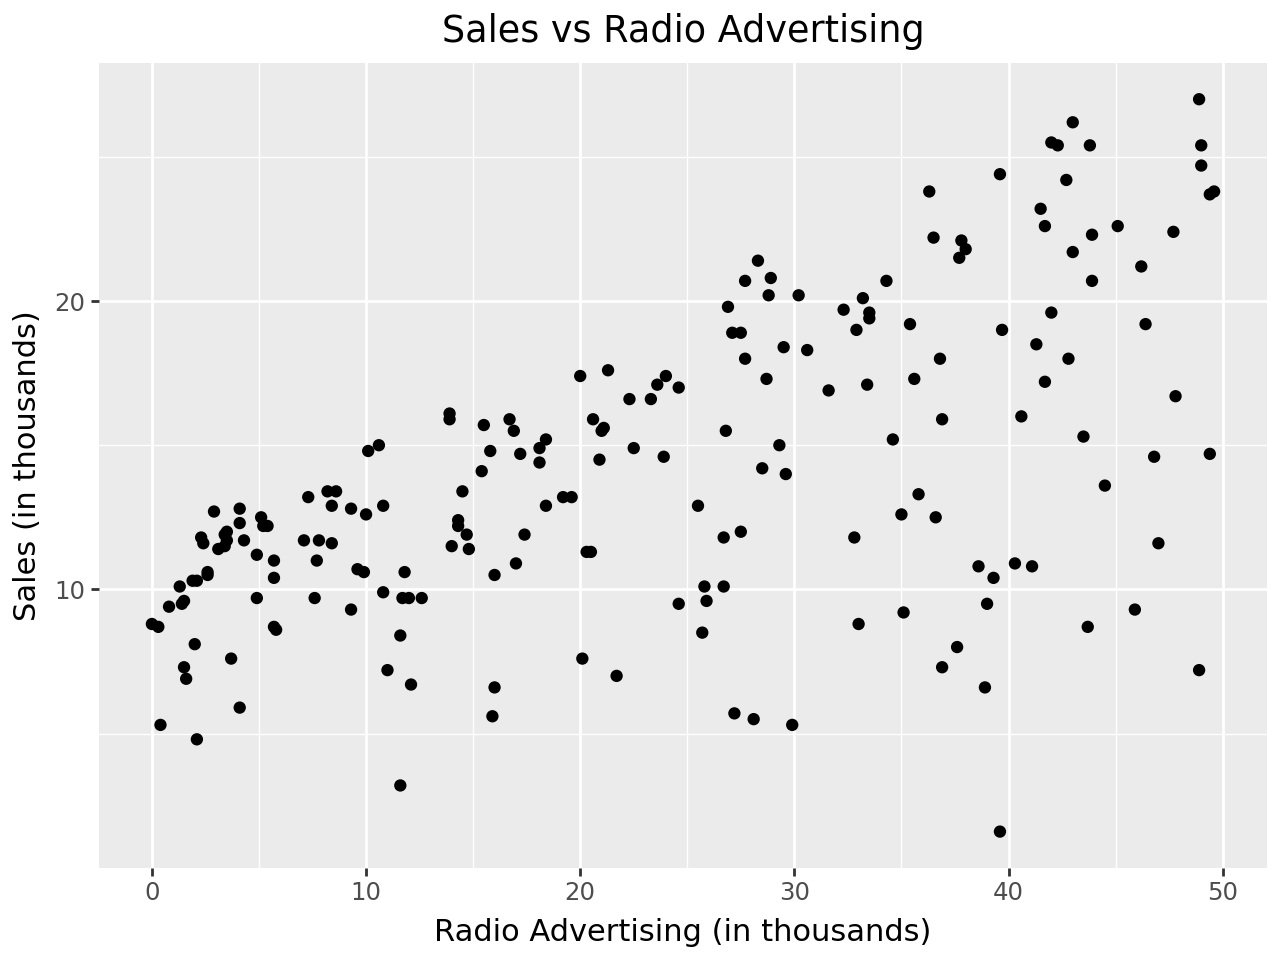

In [23]:
from plotnine import ggplot, aes, geom_point, labs

# df_pd is already defined and converted from df_fixed in previous cells

(ggplot(df_pd, aes(x='radio', y='sales'))
 + geom_point()
 + labs(title='Sales vs Radio Advertising',
        x='Radio Advertising (in thousands)',
        y='Sales (in thousands)'))

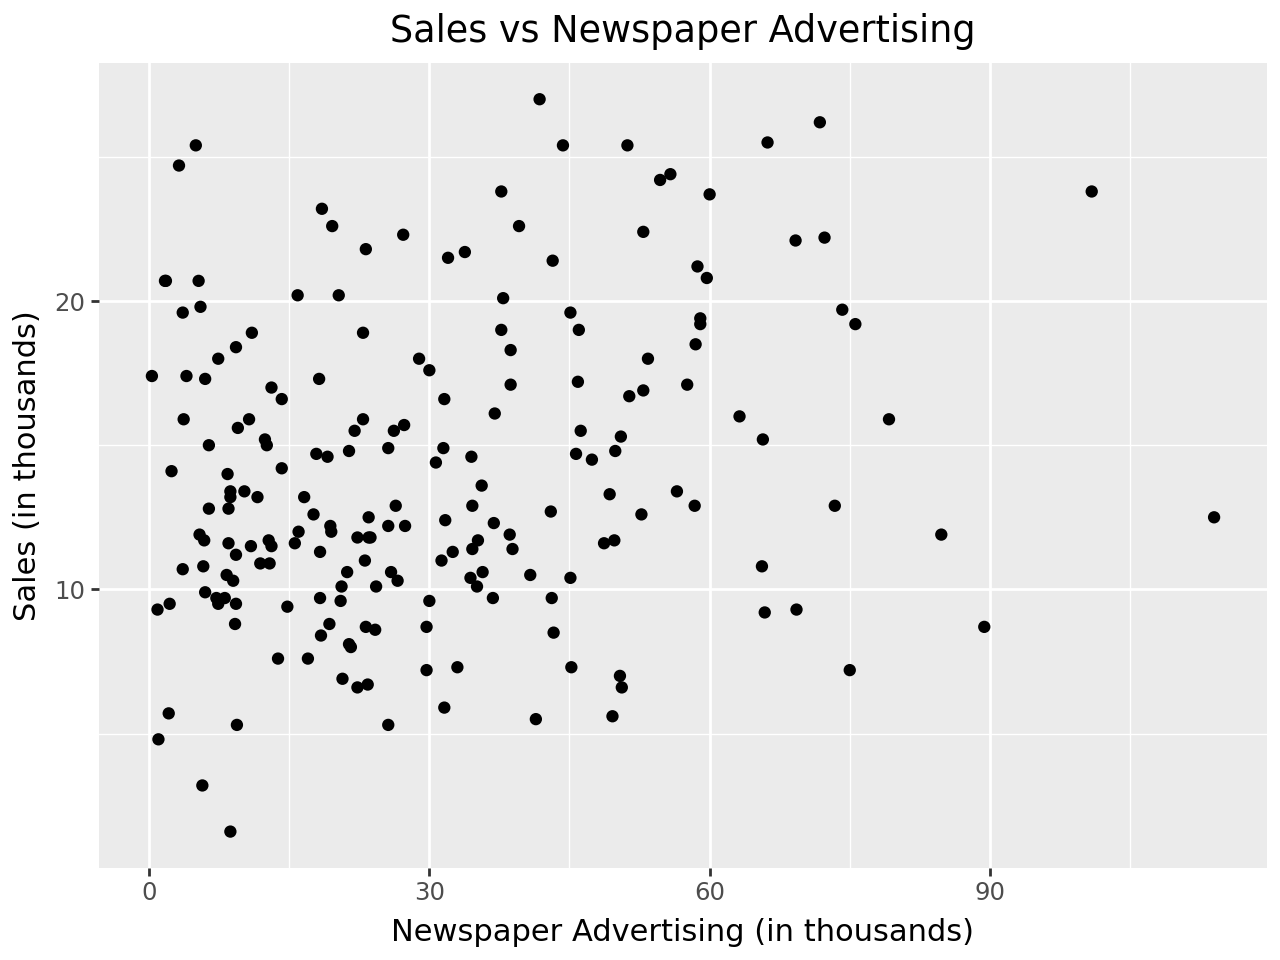

In [25]:
from plotnine import ggplot, aes, geom_point, labs

# df_pd is already defined and converted from df_fixed in previous cells

(ggplot(df_pd, aes(x='newspaper', y='sales'))
 + geom_point()
 + labs(title='Sales vs Newspaper Advertising',
        x='Newspaper Advertising (in thousands)',
        y='Sales (in thousands)'))

## Problem 3 - Extracting the features and creating a test set.

1. Ask Gemini to split the data into an X and y without any extract context.
 How did it do?  Any issues? It did good, it used manual split which isnt very effecient but it had no erros
2. Repeat the last prompt, but add the context of which columns are in X and y.  Did this fix any issues?
It automatically used sales as dependent so it basically ran the same thing twice
3. Did the results get switched to pandas or numpy?  If not, tell Gemini to redo the last step and add this additional step.
No they did not, after telling it to switch it did so with no issues
4. Ask Gemini "split the data into training and test data" with no additional context.  What happened?  Was this an acceptable approach?
It used the manual splt which is not effecient or right considering we have a whole package that can do it for you
5. Redo the last step, but now specify that `train_test_split` from `sklearn` should be used.  Better?
Yes, much more readible, less code, and makes the process better

In [62]:
# Split data into X and y without extra context
# Assuming 'sales' is the target variable (y) and the rest are features (X)
X = df_fixed.select(pl.exclude('sales'))
y = df_fixed.select('sales')

### Task 2: Repeat the last prompt, but add the context of which columns are in X and y. Did this fix any issues?

In [63]:
# Split data into X and y with explicit context
# Features (X) are 'TV', 'radio', 'newspaper'
# Target (y) is 'sales'
X_explicit = df_fixed.select(['TV', 'radio', 'newspaper'])
y_explicit = df_fixed.select('sales')

The outputs were exactly the same. Since we were using sales as dependent above it stuck with it automatically, then I told it to use sales as dependent to stay consistent

### Task 3: Did the results get switched to pandas or numpy? If not, tell Gemini to redo the last step and add this additional step.

In [64]:
# Convert X and y to pandas DataFrames for compatibility with many ML libraries
X_pd = X_explicit.to_pandas()
y_pd = y_explicit.to_pandas()

### Task 4: Ask Gemini "split the data into training and test data" with no additional context. What happened? Was this an acceptable approach?

In [65]:
# Split data into training and test sets without additional context
# Since no specific method was provided, a common approach is to manually split it.
# However, this is generally NOT recommended for reproducibility and proper data splitting.

# For demonstration purposes, I will perform a simple manual split (not ideal).
# This is done to show what 'might' happen without specific guidance.

# Determine split point (e.g., 80% for training, 20% for testing)
split_idx = int(len(X_pd) * 0.8)

X_train_manual = X_pd.iloc[:split_idx]
X_test_manual = X_pd.iloc[split_idx:]
y_train_manual = y_pd.iloc[:split_idx]
y_test_manual = y_pd.iloc[split_idx:]

This approach will work but it is sloppy, using train_test_split package makes the code more readible and efficient

### Task 5: Redo the last step, but now specify that `train_test_split` from `sklearn` should be used. Better?

In [54]:
# Split data into training and test sets using train_test_split
# Using a random_state for reproducibility
X_train, X_test, y_train, y_test = train_test_split(X_pd, y_pd, test_size=0.2, random_state=42)

In [55]:
# Display head of X_train
X_train.head()

,TV,radio,newspaper
79,116.0,7.7,23.1
197,177.0,9.3,6.4
38,43.1,26.7,35.1
24,62.3,12.6,18.3
122,224.0,2.4,15.6


In [56]:
# Display head of X_test
X_test.head()

,TV,radio,newspaper
95,163.3,31.6,52.9
15,195.4,47.7,52.9
30,292.9,28.3,43.2
158,11.7,36.9,45.2
128,220.3,49.0,3.2


In [57]:
# Display head of y_train
y_train.head()

,sales
79,11.0
197,12.8
38,10.1
24,9.7
122,11.6


In [58]:
# Display head of y_test
y_test.head()

,sales
95,16.9
15,22.4
30,21.4
158,7.3
128,24.7


## Problem 4 - Case 1: Prediction.

First, suppose our primary goal is to build the model with the best predictive performance.  Use Gemini to fit both a linear regression model as well as k nearest neighbors regressor using the training data then test the performance using the test data.  

**Questions.**
1. Which model is better? Be sure that you use MSPE to compare the results.
Since a lower MSPE indicates better predictive performance, the K-Nearest Neighbors model is better for this prediction task with an MSPE of 2.82 compared to the Linear Regression model's MSPE of 3.17.

2. Linear regression (OLS) is an example of a parametric model, since the model can be written out with an equation involving some parameters.  Find and interpret the parameters of the fitted model.
The fitted linear regression model is
Sales = 2.98 + 0.045·TV + 0.189·Radio + 0.003·Newspaper,
showing that Radio has the largest association with sales, followed by TV, while Newspaper has a near-zero effect.
3. kNN is an example of a non-parametric model, since it doesn't include a model specification involving an equation with parameters.  In this context (pure prediction), is there any down-side to the lack of parameters?  Explain.
In pure prediction, the lack of parameters in kNN is not a major downside because it allows the model to flexibly fit complex, non-linear patterns. The main drawback is practical: kNN can be slow and memory-intensive on large datasets since it must store all training data and compute distances for each prediction.

In [48]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error

# Initialize and train the Linear Regression model
linear_model = LinearRegression()
linear_model.fit(X_train, y_train)

# Make predictions on the test set
y_pred_lr = linear_model.predict(X_test)

# Calculate Mean Squared Prediction Error (MSPE) using an assignment expression
(mspe_lr := mean_squared_error(y_test, y_pred_lr))

3.1740973539761033

In [49]:
# Display Linear Regression Coefficients implicitly
linear_model.coef_

array([[0.04472952, 0.18919505, 0.00276111]])

In [50]:
# Display Linear Regression Intercept implicitly
linear_model.intercept_

array([2.97906734])

In [52]:
from sklearn.neighbors import KNeighborsRegressor
from sklearn.metrics import mean_squared_error

# Initialize and train the K-Nearest Neighbors Regressor (e.g., with k=5)
knn_model = KNeighborsRegressor(n_neighbors=5)
knn_model.fit(X_train, y_train)

# Make predictions on the test set
y_pred_knn = knn_model.predict(X_test)

# Calculate Mean Squared Prediction Error (MSPE)
(mspe_knn := mean_squared_error(y_test, y_pred_knn))

2.8211400000000006

## Problem 5 - Case 2: Exploring association.

**Objective.** We want to answer the following questions?
1. Which media are associated with sales?
All three media (TV, Radio, and Newspaper) show an association with sales, as their coefficients are non-zero. However, the strength of this association varies significantly.
2. Which media generate the biggest boost in sales?
 Based on the coefficients, Radio advertising generates the biggest boost in sales. Its coefficient (0.189) is the largest, meaning for every thousand dollars spent on radio, sales are predicted to increase by 0.189 thousand units, holding other factors constant.

3. How large of an increase in sales is associated with a given increase in TV advertising?
For every thousand dollar increase in TV advertising, there is an associated increase of 0.045 thousand units (or 45 units) in sales, assuming Radio and Newspaper advertising remain constant.

**Questions.**
1. Which model is better in this case? Why?
Linear Regression is better. Its interpretable parameters directly quantify associations, which is the goal when exploring relationships.

2. What is the advantage of the parametric and linear nature of the OLS model?How might this help us answer the questions?
OLS provides explicit coefficients for each predictor, directly indicating the strength and direction of association. This allows us to quantify the impact of each media type on sales.

3. How might you answer our questions using kNN, and consequently, what is the disadvantage of the non-parametric nature of kNN in this context?
 Answering with kNN is difficult as it lacks explicit parameters. One would need indirect methods like feature importance or sensitivity analysis, which are complex and less precise for interpreting individual variable contributions.

## Problem 6 - Answer the previous questions.

Now use OLS and what you have learned in STAT 360 to answer the questions posed in the previous problem.

**Hint.** You should

1. refit the model using `statsmodels` to take advantage of all the staty goodness,
2. Be sure to consider things like uncertainty and problems with multiple comparisons, and
3. Ask Gemini for help, if for example, you want to use Tukey's method.

In [45]:
import statsmodels.api as sm

# Add a constant (intercept) to the independent variables for statsmodels
X_train_sm = sm.add_constant(X_train)
X_test_sm = sm.add_constant(X_test)

# Create and fit the OLS model
ols_model = sm.OLS(y_train, X_train_sm)
ols_results = ols_model.fit()

# Display the model summary (implicitly displayed by calling it as the last expression)
ols_results.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  sales   R-squared:                       0.896
Model:                            OLS   Adj. R-squared:                  0.894
Method:                 Least Squares   F-statistic:                     446.6
Date:                Thu, 15 Jan 2026   Prob (F-statistic):           2.53e-76
Time:                        17:57:45   Log-Likelihood:                -306.64
No. Observations:                 160   AIC:                             621.3
Df Residuals:                     156   BIC:                             633.6
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          2.9791      0.354      8.427      0.000       2.281       3.677
TV             0.0447      0.002     28.544      0.000       0.042       0.048
radio          0.1892      0.010     19.518      0.000       0.170       0.208
newspaper      0.0028      0.007      0.392      0.696      -0.011       0.017
==============================================================================
Omnibus:                       67.697   Durbin-Watson:                   2.161
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              240.326
Skew:                          -1.627   Prob(JB):                     6.52e-53
Kurtosis:                       8.046   Cond. No.                         471.
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [47]:
# Optionally, you can also make predictions and calculate MSPE to compare with sklearn model
y_pred_ols = ols_results.predict(X_test_sm)
mspe_ols = mean_squared_error(y_test, y_pred_ols)
mspe_ols

3.1740973539761037

In [46]:
from sklearn.metrics import mean_squared_error

# Make predictions and calculate MSPE for the statsmodels OLS model
y_pred_ols = ols_results.predict(X_test_sm)
(mspe_ols := mean_squared_error(y_test, y_pred_ols))

3.1740973539761037

## Problem 7 - Vibe-coding wrap up.

**Questions.**
1. What should we do if an LLM like Gemini uses a sub-optimal package to performa a task?
I like to highlight the current cell and spoon feed the LLM what I want to use and how to use it. If i see data management in pandas for example I tell it to strictly use polars now and for the rest of the notebook.
2. What is the alternative to the assignment statement?  Why is using this alternative beneficial when working in a notebook?
The alternative is an assignment expression, which is beneficial in a notebook because it lets you assign and display values in a single cell, keeping code cleaner and more readable.
3. What is the alternative to using `print` calls when working in a notebook?  Why is the alternative approach beneficial?
The alternative to print is relying on the last expression in a cell to display output, which is beneficial because notebooks automatically render results more cleanly without cluttering the code.
4. What should we do if an LLM like Gemini includes unnecessarily complex code, e.g., multiple messy print class?
If an LLM includes unnecessarily complex code, you should simplify, refactor, or rewrite it to match best practices and improve clarity and maintainability.
5. Who is incharge, you or the LLM?
I am in charge, it does not tell me what to do I tell it what to do

# Task
Explain in a text cell why Tukey's HSD is not directly applicable to comparing continuous regression coefficients and how multiple comparisons are addressed in OLS using the statsmodels summary.

## Explain Tukey's method applicability

### Subtask:
Provide a detailed explanation within the selected code cell about why Tukey's HSD is not directly applicable to comparing continuous regression coefficients and how multiple comparisons are addressed in OLS using the statsmodels summary.
